# Data Analysis 실습

1. 전처리(Preprocessing): 데이터 정제 및 가공
2. 탐색적 데이터 분석(EDA): 데이터의 특성 파악
3. 통계 분석: 수치를 통한 인사이트 도출

<br>

|정형 데이터|반정형데이터|비정형데이터|
|---|---|---|
|- 특징: 행과 열로 정렬된 테이블 형태<br>- 예시: CSV, Excel, 데이터베이스<br>- 처리: 결측치 처리, 이상치 처리, 통계 분석 가능<br>- 장점: 분석하기 쉬움|- 특징: 일부 구조가 있지만 완전히 정형화되지 않음<br>- 예시: JSON, XML, 로그 파일<br>- 처리: 파싱 필요, 구조 추출, 필드별 분석<br>- 장점: 다양한 정보 포함 가능|- 특징: 구조가 없는 순수 텍스트, 이미지, 음성 등<br>- 예시: 리뷰, 이메일, 뉴스 기사<br>- 처리: 텍스트 전처리, 토큰화, 감정 분석 등<br>- 장점: 풍부한 정보와 통찰 제공|

<br>

---

## ✔️ 라이브러리 불러오기

In [8]:
import pandas as pd
import numpy as np
import re
import json

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 시각화 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False

## ✔️ 정형데이터(Structured Data) - CSV 형태의 테이블 데이터

In [ ]:
structured_data = {
    '상품명': ['노트북', '마우스', '키보드', '모니터', '웹캠', '노트북', '마우스', '키보드'],
    '가격': [1200000, 35000, 85000, 320000, 65000, 1200000, 35000, 85000],
    '판매량': [2, 15, 8, 3, 12, 1, 20, 5],
    '평점': [4.5, np.nan, 4.8, 101, 3.9, 4.5, np.nan, 4.8],
    '카테고리': ['전자기기', '액세서리', '액세서리', '전자기기', '액세서리', '전자기기', '액세서리', '액세서리'],
}

df_structured = pd.DataFrame(structured_data)
df_structured

In [ ]:
# 결측치 확인
print(df_structured.isnull().sum())

### 전처리

In [ ]:
# 결측치 처리

# '평점' 컬럼에서 평균값 계산하여 채우기
df_mean_filled = df_structured.copy()
mean_rating = df_structured['평점'].mean()
df_mean_filled['평점'] = df_mean_filled['평점'].fillna(mean_rating)

# '평점' 컬럼에서 중앙값 계산하여 채우기
df_median_filled = df_structured.copy()
median_rating = df_structured['평점'].median()
df_median_filled['평점'] = df_median_filled['평점'].fillna(median_rating)

# 특정 값으로 채우기
df_zero_filled = df_structured.copy()
df_zero_filled['평점'] = df_zero_filled['평점'].fillna(0)

print("\n원본 데이터프레임:\n", df_structured)
print("\n평균값으로 결측치 채우기:\n", df_mean_filled)
print("\n중앙값으로 결측치 채우기:\n", df_median_filled)
print("\n0으로 결측치 채우기:\n", df_zero_filled)


In [ ]:
# 이상치 처리 (평점이 5점 이상인 경우 5로 조정)
print("이상치 처리 (평점 5점 이상 → 5점으로 조정)")
df_clipped = df_structured.copy()
df_clipped['평점'] = df_clipped['평점'].clip(upper=5.0)
print("\n원본 데이터프레임:\n", df_structured)
print("\n이상치 처리된 데이터프레임:\n", df_clipped)

In [9]:
# 전처리 완료
df_final = df_structured.copy()

df_final['평점'] = df_final['평점'].clip(upper=5.0)

mean_rating = df_final['평점'].mean()
df_final['평점'] = df_final['평점'].fillna(mean_rating)

df_final

,상품명,가격,판매량,평점,카테고리
0,노트북,1200000,2,4.500000,전자기기
1,마우스,35000,15,4.583333,액세서리
2,키보드,85000,8,4.800000,액세서리
3,모니터,320000,3,5.000000,전자기기
4,웹캠,65000,12,3.900000,액세서리
5,노트북,1200000,1,4.500000,전자기기
6,마우스,35000,20,4.583333,액세서리
7,키보드,85000,5,4.800000,액세서리


### 분석

In [10]:
# 기초 통계량
print("\n가격과 판매량의 기초 통계량")
print(f"평균 가격: {df_final['가격'].mean():,.0f}원")
print(f"중앙값 가격: {df_final['가격'].median():,.0f}원")
print(f"최고 가격: {df_final['가격'].max():,.0f}원")
print(f"최저 가격: {df_final['가격'].min():,.0f}원")
print(f"\n평균 판매량: {df_final['판매량'].mean():.1f}개")
print(f"총 판매량: {df_final['판매량'].sum()}개")


가격과 판매량의 기초 통계량
평균 가격: 378,125원
중앙값 가격: 85,000원
최고 가격: 1,200,000원
최저 가격: 35,000원

평균 판매량: 8.2개
총 판매량: 66개


In [11]:
# 그룹 분석 (카테고리별 평균 판매량)
print("\n카테고리별 분석")
category_analysis = df_final.groupby('카테고리').agg({
    '판매량': 'mean',
    '가격': 'mean',
    '평점': 'mean'
}).round(2)
category_analysis


카테고리별 분석


,판매량,가격,평점
카테고리,,,
액세서리,12.0,61000.00,4.53
전자기기,2.0,906666.67,4.67


In [12]:
# 매출 분석 (가격 × 판매량)
print("\n상품별 매출 분석")
df_final['매출'] = df_final['가격'] * df_final['판매량']
sales_by_product = df_final[['상품명', '가격', '판매량', '매출']].drop_duplicates()
sales_by_product = sales_by_product.sort_values('매출', ascending=False)
print(sales_by_product)
print(f"\n총 매출: {df_final['매출'].sum():,.0f}원")


상품별 매출 분석
   상품명       가격  판매량       매출
0  노트북  1200000    2  2400000
5  노트북  1200000    1  1200000
3  모니터   320000    3   960000
4   웹캠    65000   12   780000
6  마우스    35000   20   700000
2  키보드    85000    8   680000
1  마우스    35000   15   525000
7  키보드    85000    5   425000

총 매출: 7,670,000원


## ✔️ 반정형데이터(Semi-Structured Data) - JSON 형태의 데이터

In [17]:
# 반정형데이터 예시: SNS 게시물 데이터 (JSON)
semi_structured_json = '''[
    {"id": 1, "username": "user1", "content": "안녕하세요", "likes": 15, "comments": 3, "date": "2024-01-01"},
    {"id": 2, "username": "user2", "content": "오늘 날씨 좋네요", "likes": 42, "comments": 8, "date": "2024-01-02"},
    {"id": 3, "username": "user1", "content": "새로운 프로젝트 시작했어요", "likes": 28, "comments": 5, "date": "2024-01-03"},
    {"id": 4, "username": "user3", "content": "데이터 분석 공부 중", "likes": 35, "comments": 7, "date": "2024-01-04"},
    {"id": 5, "username": "user2", "content": "파이썬 너무 재미있어요", "likes": 50, "comments": 12, "date": "2024-01-05"}
]'''

# JSON 파싱 (문자열 → 파이썬 객체)
print("\n[원본 데이터] JSON 형태의 SNS 게시물")
semi_data = json.loads(semi_structured_json)
json.dumps(semi_data[:2], ensure_ascii=False)


[원본 데이터] JSON 형태의 SNS 게시물


'[{"id": 1, "username": "user1", "content": "안녕하세요", "likes": 15, "comments": 3, "date": "2024-01-01"}, {"id": 2, "username": "user2", "content": "오늘 날씨 좋네요", "likes": 42, "comments": 8, "date": "2024-01-02"}]'

In [18]:
# JSON을 DataFrame으로 변환
df_semi = pd.DataFrame(semi_data)
df_semi

,id,username,content,likes,comments,date
0,1,user1,안녕하세요,15,3,2024-01-01
1,2,user2,오늘 날씨 좋네요,42,8,2024-01-02
2,3,user1,새로운 프로젝트 시작했어요,28,5,2024-01-03
3,4,user3,데이터 분석 공부 중,35,7,2024-01-04
4,5,user2,파이썬 너무 재미있어요,50,12,2024-01-05


### 전처리

In [19]:
df_semi.dtypes

id           int64
username    object
content     object
likes        int64
comments     int64
date        object
dtype: object

In [20]:
# 데이터 타입 변환
print("\n데이터 타입 변환")
df_semi['date'] = pd.to_datetime(df_semi['date'])  # 문자열 → 날짜

df_semi.dtypes


데이터 타입 변환


id                   int64
username            object
content             object
likes                int64
comments             int64
date        datetime64[ns]
dtype: object

In [21]:
df_semi['engagement_rate'] = (df_semi['likes'] + df_semi['comments']) / 10  # 새 컬럼 생성
df_semi

,id,username,content,likes,comments,date,engagement_rate
0,1,user1,안녕하세요,15,3,2024-01-01,1.8
1,2,user2,오늘 날씨 좋네요,42,8,2024-01-02,5.0
2,3,user1,새로운 프로젝트 시작했어요,28,5,2024-01-03,3.3
3,4,user3,데이터 분석 공부 중,35,7,2024-01-04,4.2
4,5,user2,파이썬 너무 재미있어요,50,12,2024-01-05,6.2


### 분석

In [22]:
# 텍스트 길이 계산
print("\n게시물 길이 분석")
df_semi['content_length'] = df_semi['content'].str.len()
df_semi[['username', 'content', 'content_length']]


게시물 길이 분석


,username,content,content_length
0,user1,안녕하세요,5
1,user2,오늘 날씨 좋네요,9
2,user1,새로운 프로젝트 시작했어요,14
3,user3,데이터 분석 공부 중,11
4,user2,파이썬 너무 재미있어요,12


In [23]:
# 사용자별 활동 분석
print("\n사용자별 활동 통계")
user_stats = df_semi.groupby('username').agg({
    'id': 'count',
    'likes': 'sum',
    'comments': 'sum',
    'content_length': 'mean'
}).rename(columns={'id': '게시물_수'})
user_stats = user_stats.round(1)
user_stats


사용자별 활동 통계


,게시물_수,likes,comments,content_length
username,,,,
user1,2,43,8,9.5
user2,2,92,20,10.5
user3,1,35,7,11.0


In [24]:
# 상호작용 분석 (좋아요 vs 댓글)
print("\n상호작용 분석")
print(f"평균 좋아요: {df_semi['likes'].mean():.1f}")
print(f"평균 댓글: {df_semi['comments'].mean():.1f}")
print(f"가장 인기 많은 게시물: '{df_semi.loc[df_semi['likes'].idxmax(), 'content']}' ({df_semi['likes'].max()} likes)")


상호작용 분석
평균 좋아요: 34.0
평균 댓글: 7.0
가장 인기 많은 게시물: '파이썬 너무 재미있어요' (50 likes)


In [25]:
# 시간 분석 (날짜별 트렌드)
print("\n날짜별 좋아요 트렌드")
date_trend = df_semi.groupby('date')['likes'].sum()
date_trend


날짜별 좋아요 트렌드


date
2024-01-01    15
2024-01-02    42
2024-01-03    28
2024-01-04    35
2024-01-05    50
Name: likes, dtype: int64

## ✔️ 비정형데이터(Unstructured Data) - 텍스트 데이터

In [26]:
# 비정형데이터 예시: 상품 리뷰 텍스트 데이터
unstructured_data = {
    'review': [
        '이 제품은 정말 좋습니다. 가격도 저렴하고 품질도 우수합니다.',
        '품질이 형편없네요. 돈 낭비였습니다;;;',
        '좋습니다. 배송도 빠르고 고객 서비스도 훌륭합니다^^',
        '그냥 그래요. 평범한 제품입니다.',
        '최고 최고! 또 사고 싶어요. 강력 추천합니다!',
        '배송은 빨랐지만 제품이 망가져 있었어요ㅠㅠ',
        '가격 대비 품질이 좋습니다. 만족합니다ㅎㅎ',
        '별로예요. 기대보다 못 했습니다.'
    ],
    'rating': [5, 1, 5, 3, 5, 2, 4, 2]
}

df_unstructured = pd.DataFrame(unstructured_data)

print("\n[원본 데이터] 상품 리뷰 텍스트")
df_unstructured


[원본 데이터] 상품 리뷰 텍스트


,review,rating
0,이 제품은 정말 좋습니다. 가격도 저렴하고 품질도 우수합니다.,5
1,품질이 형편없네요. 돈 낭비였습니다;;;,1
2,좋습니다. 배송도 빠르고 고객 서비스도 훌륭합니다^^,5
3,그냥 그래요. 평범한 제품입니다.,3
4,최고 최고! 또 사고 싶어요. 강력 추천합니다!,5
5,배송은 빨랐지만 제품이 망가져 있었어요ㅠㅠ,2
6,가격 대비 품질이 좋습니다. 만족합니다ㅎㅎ,4
7,별로예요. 기대보다 못 했습니다.,2


### 전처리

In [28]:
# 텍스트 정규화 (소문자, 특수문자 제거)
print("\n텍스트 정규화")
df_unstructured['review_cleaned'] = df_unstructured['review'].str.lower()

# 한글은 유지하고 특수문자만 제거
df_unstructured['review_cleaned'] = df_unstructured['review_cleaned'].apply(
    lambda x: re.sub(r'[^가-힣a-zA-Z0-9\s]', '', 
             re.sub(r'[ㅎㅋ^]+', ' 웃음 ', 
             re.sub(r'[ㅠㅜ;]+', ' 슬픔 ', x)))
)

df_unstructured[['review', 'review_cleaned']]


텍스트 정규화


,review,review_cleaned
0,이 제품은 정말 좋습니다. 가격도 저렴하고 품질도 우수합니다.,이 제품은 정말 좋습니다 가격도 저렴하고 품질도 우수합니다
1,품질이 형편없네요. 돈 낭비였습니다;;;,품질이 형편없네요 돈 낭비였습니다 슬픔
2,좋습니다. 배송도 빠르고 고객 서비스도 훌륭합니다^^,좋습니다 배송도 빠르고 고객 서비스도 훌륭합니다 웃음
3,그냥 그래요. 평범한 제품입니다.,그냥 그래요 평범한 제품입니다
4,최고 최고! 또 사고 싶어요. 강력 추천합니다!,최고 최고 또 사고 싶어요 강력 추천합니다
5,배송은 빨랐지만 제품이 망가져 있었어요ㅠㅠ,배송은 빨랐지만 제품이 망가져 있었어요 슬픔
6,가격 대비 품질이 좋습니다. 만족합니다ㅎㅎ,가격 대비 품질이 좋습니다 만족합니다 웃음
7,별로예요. 기대보다 못 했습니다.,별로예요 기대보다 못 했습니다


In [29]:
# 단어 분리 (토큰화)
print("\n단어 분리 및 키워드 추출")

# 긍정 키워드, 부정 키워드 정의
positive_words = ['좋', '우수', '훌륭', '최고', '강력', '만족', '웃음']
negative_words = ['형편없', '낭비', '별로', '망가', '못', '슬픔']

df_unstructured['positive_count'] = df_unstructured['review_cleaned'].apply(
    lambda x: sum(1 for word in positive_words if word in x)
)

df_unstructured['negative_count'] = df_unstructured['review_cleaned'].apply(
    lambda x: sum(1 for word in negative_words if word in x)
)

df_unstructured[['review', 'positive_count', 'negative_count']]


단어 분리 및 키워드 추출


,review,positive_count,negative_count
0,이 제품은 정말 좋습니다. 가격도 저렴하고 품질도 우수합니다.,2,0
1,품질이 형편없네요. 돈 낭비였습니다;;;,0,3
2,좋습니다. 배송도 빠르고 고객 서비스도 훌륭합니다^^,3,0
3,그냥 그래요. 평범한 제품입니다.,0,0
4,최고 최고! 또 사고 싶어요. 강력 추천합니다!,2,0
5,배송은 빨랐지만 제품이 망가져 있었어요ㅠㅠ,0,2
6,가격 대비 품질이 좋습니다. 만족합니다ㅎㅎ,3,0
7,별로예요. 기대보다 못 했습니다.,0,2


### 분석

In [30]:
# 평점 분포 분석
print("\n평점 분포 분석")
rating_distribution = df_unstructured['rating'].value_counts().sort_index(ascending=False)
print("평점별 리뷰 개수:")
for rating, count in rating_distribution.items():
    print(f"  {rating}점: {'★' * rating} ({count}개)")
print(f"\n평균 평점: {df_unstructured['rating'].mean():.2f}점")


평점 분포 분석
평점별 리뷰 개수:
  5점: ★★★★★ (3개)
  4점: ★★★★ (1개)
  3점: ★★★ (1개)
  2점: ★★ (2개)
  1점: ★ (1개)

평균 평점: 3.38점


In [31]:
# 감정 분석 (긍정/부정)
print("\n감정 분석")
df_unstructured['sentiment'] = df_unstructured.apply(
    lambda row: '긍정' if row['positive_count'] > row['negative_count'] else ('부정' if row['negative_count'] > row['positive_count'] else '중립'),
    axis=1
)
sentiment_count = df_unstructured['sentiment'].value_counts()
print(f"긍정: {sentiment_count.get('긍정', 0)}개")
print(f"부정: {sentiment_count.get('부정', 0)}개")
print(f"중립: {sentiment_count.get('중립', 0)}개")


감정 분석
긍정: 4개
부정: 3개
중립: 1개


In [32]:
# 평점과 감정의 연관성
print("\n평점과 감정의 연관성")
sentiment_rating = pd.crosstab(df_unstructured['sentiment'], df_unstructured['rating'])
print(sentiment_rating)
print(f"\n긍정 리뷰의 평균 평점: {df_unstructured[df_unstructured['sentiment'] == '긍정']['rating'].mean():.2f}점")
print(f"부정 리뷰의 평균 평점: {df_unstructured[df_unstructured['sentiment'] == '부정']['rating'].mean():.2f}점")


평점과 감정의 연관성
rating     1  2  3  4  5
sentiment               
긍정         0  0  0  1  3
부정         1  2  0  0  0
중립         0  0  1  0  0

긍정 리뷰의 평균 평점: 4.75점
부정 리뷰의 평균 평점: 1.67점


## ✔️ 비정형데이터(Unstructured Data) - 텍스트 데이터

In [33]:
# 비정형데이터 예시: 뉴스 데이터

data = {
    "title": [
        "AI 기술, 산업 전반으로 확산", "삼성전자, 반도체 실적 회복 기대",
        "부동산 시장, 금리 인하로 회복세", "테슬라, 신형 전기차 공개",
        "정부, 탄소중립 정책 강화", "국내 스타트업 투자 유치 활발",
        "애플, 새로운 아이폰 공개", "주식 시장, 외국인 매수세 확대",
        "넷플릭스, 구독자 수 사상 최고", "전기차 배터리 산업 경쟁 치열"
    ],
    "category": [
        "IT/과학", "경제", "경제", "IT/과학", "사회", 
        "경제", "IT/과학", "경제", "문화", "산업"
    ],
    "publisher": [
        "연합뉴스", "한국경제", "머니투데이", "전자신문", "조선일보",
        "서울경제", "ZDNet Korea", "매일경제", "중앙일보", "파이낸셜뉴스"
    ],
    "viewCount": [12500, 9800, 11200, 15400, 7600, 8900, 17800, 13200, 14700, 9300],
    "likeCount": [320, 210, 260, 450, 190, 230, 480, 300, 420, 250],
    "publishedDate": [
        "2023-02-10", "2023-02-12", "2023-03-05", "2023-04-01", "2023-05-11",
        "2023-06-20", "2023-08-15", "2023-09-05", "2023-10-21", "2023-11-03"
    ]
}

df = pd.DataFrame(data)
df.head()

,title,category,publisher,viewCount,likeCount,publishedDate
0,"AI 기술, 산업 전반으로 확산",IT/과학,연합뉴스,12500,320,2023-02-10
1,"삼성전자, 반도체 실적 회복 기대",경제,한국경제,9800,210,2023-02-12
2,"부동산 시장, 금리 인하로 회복세",경제,머니투데이,11200,260,2023-03-05
3,"테슬라, 신형 전기차 공개",IT/과학,전자신문,15400,450,2023-04-01
4,"정부, 탄소중립 정책 강화",사회,조선일보,7600,190,2023-05-11


### 전처리

In [34]:
# 데이터 타입 변환

df["publishedDate"] = pd.to_datetime(df["publishedDate"])
df.dtypes

title                    object
category                 object
publisher                object
viewCount                 int64
likeCount                 int64
publishedDate    datetime64[ns]
dtype: object

In [35]:
# 날짜, 연도, 월 추출

df["year"] = df["publishedDate"].dt.year
df["month"] = df["publishedDate"].dt.month
df

,title,category,publisher,viewCount,likeCount,publishedDate,year,month
0,"AI 기술, 산업 전반으로 확산",IT/과학,연합뉴스,12500,320,2023-02-10,2023,2
1,"삼성전자, 반도체 실적 회복 기대",경제,한국경제,9800,210,2023-02-12,2023,2
2,"부동산 시장, 금리 인하로 회복세",경제,머니투데이,11200,260,2023-03-05,2023,3
3,"테슬라, 신형 전기차 공개",IT/과학,전자신문,15400,450,2023-04-01,2023,4
4,"정부, 탄소중립 정책 강화",사회,조선일보,7600,190,2023-05-11,2023,5
5,국내 스타트업 투자 유치 활발,경제,서울경제,8900,230,2023-06-20,2023,6
6,"애플, 새로운 아이폰 공개",IT/과학,ZDNet Korea,17800,480,2023-08-15,2023,8
7,"주식 시장, 외국인 매수세 확대",경제,매일경제,13200,300,2023-09-05,2023,9
8,"넷플릭스, 구독자 수 사상 최고",문화,중앙일보,14700,420,2023-10-21,2023,10
9,전기차 배터리 산업 경쟁 치열,산업,파이낸셜뉴스,9300,250,2023-11-03,2023,11


In [36]:
# 결측치 확인

display(df.isnull().sum())

title            0
category         0
publisher        0
viewCount        0
likeCount        0
publishedDate    0
year             0
month            0
dtype: int64

In [37]:
# 새로운 변수 만들기

df["likeRate"] = (df["likeCount"] / df["viewCount"] * 100).round(2)
df.head()

,title,category,publisher,viewCount,likeCount,publishedDate,year,month,likeRate
0,"AI 기술, 산업 전반으로 확산",IT/과학,연합뉴스,12500,320,2023-02-10,2023,2,2.56
1,"삼성전자, 반도체 실적 회복 기대",경제,한국경제,9800,210,2023-02-12,2023,2,2.14
2,"부동산 시장, 금리 인하로 회복세",경제,머니투데이,11200,260,2023-03-05,2023,3,2.32
3,"테슬라, 신형 전기차 공개",IT/과학,전자신문,15400,450,2023-04-01,2023,4,2.92
4,"정부, 탄소중립 정책 강화",사회,조선일보,7600,190,2023-05-11,2023,5,2.50


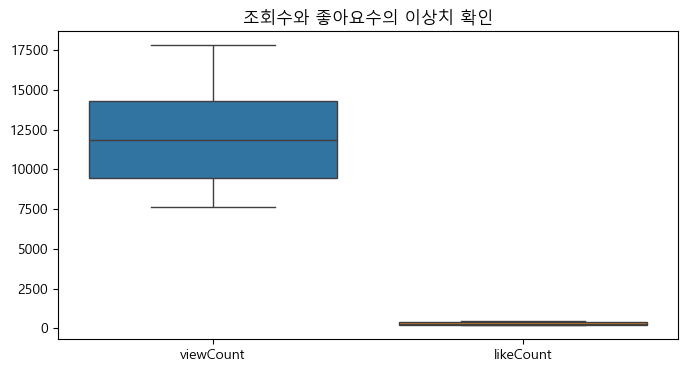

In [38]:
# 이상치 확인

import seaborn as sns
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[["viewCount", "likeCount"]])
plt.title("조회수와 좋아요수의 이상치 확인")
plt.show()

# 박스플롯 해석 방법
# 1. 박스플롯의 중앙선은 데이터의 중앙값(중위수)을 나타냅니다.
# 2. 박스의 상단과 하단은 각각 제3사분위수(Q3, 데이터의 상위 25% 지점)와 제1사분위수(Q1, 데이터의 하위 25% 지점)를 나타냅니다.
# 3. 박스의 높이(상자 길이)는 IQR(Interquartile Range, Q3 - Q1)을 나타냅니다.
# 4. 수염(whiskers)은 일반적으로 Q1 - 1.5*IQR과 Q3 + 1.5*IQR 범위 내의 데이터를 포함합니다.
# 5. 수염 밖에 위치한 점들은 이상치(outliers)로 간주됩니다.

### 탐색적 데이터 분석 (EDA)

In [39]:
# 전체 요약

df.describe()

,viewCount,likeCount,publishedDate,year,month,likeRate
count,10.000000,10.000000,10,10.0,10.000000,10.000000
mean,12040.000000,311.000000,2023-06-10 16:48:00,2023.0,6.000000,2.554000
min,7600.000000,190.000000,2023-02-10 00:00:00,2023.0,2.000000,2.140000
25%,9425.000000,235.000000,2023-03-11 18:00:00,2023.0,3.250000,2.365000
50%,11850.000000,280.000000,2023-05-31 00:00:00,2023.0,5.500000,2.570000
75%,14325.000000,395.000000,2023-08-30 18:00:00,2023.0,8.750000,2.697500
max,17800.000000,480.000000,2023-11-03 00:00:00,2023.0,11.000000,2.920000
std,3264.352922,104.184665,NaN,0.0,3.333333,0.253386


C:\Users\USER\AppData\Local\Temp\ipykernel_4992\2221320861.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="category", palette="pastel")


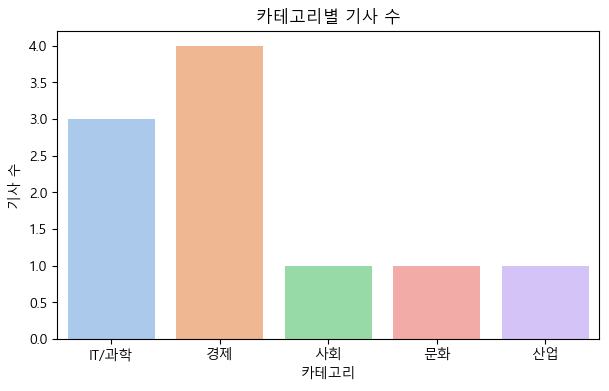

In [40]:
# 뉴스 카테고리별 기사 수

plt.figure(figsize=(7,4))
sns.countplot(data=df, x="category", palette="pastel")
plt.title("카테고리별 기사 수")
plt.xlabel("카테고리")
plt.ylabel("기사 수")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_4992\1320322378.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="category", y="viewCount", palette="Blues_d")


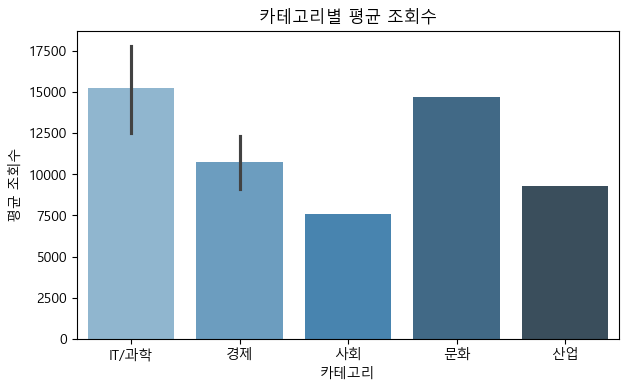

In [41]:
# 카테고리별 평균 조회수

plt.figure(figsize=(7,4))
sns.barplot(data=df, x="category", y="viewCount", palette="Blues_d")
plt.title("카테고리별 평균 조회수")
plt.xlabel("카테고리")
plt.ylabel("평균 조회수")
plt.show()

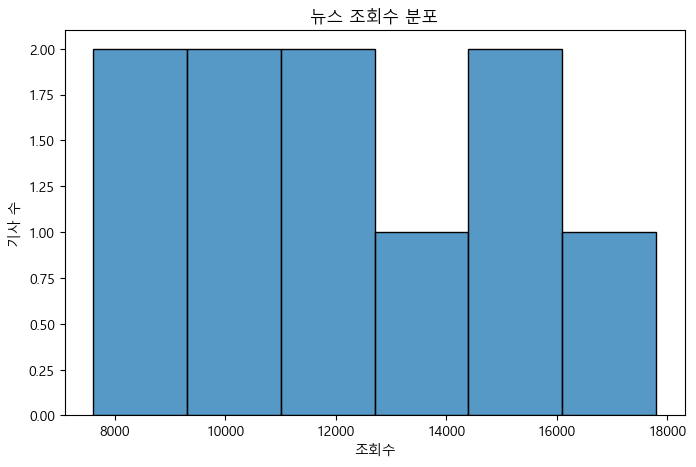

In [42]:
# 조회수 분포

plt.figure(figsize=(8,5))
sns.histplot(df["viewCount"], bins=6)
plt.title("뉴스 조회수 분포")
plt.xlabel("조회수")
plt.ylabel("기사 수")
plt.show()

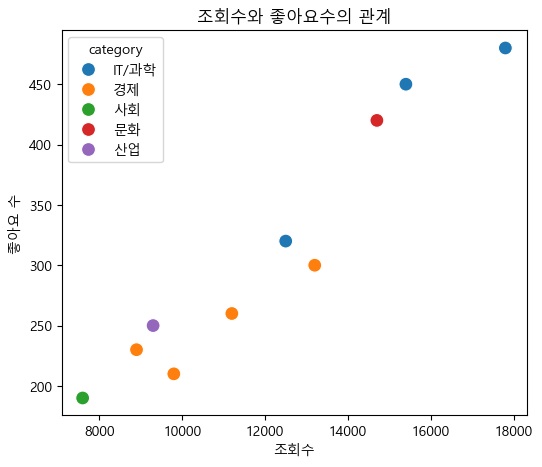

In [43]:
# 좋아요수 vs 조회수 관계

plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="viewCount", y="likeCount", hue="category", s=100)
plt.title("조회수와 좋아요수의 관계")
plt.xlabel("조회수")
plt.ylabel("좋아요 수")
plt.show()

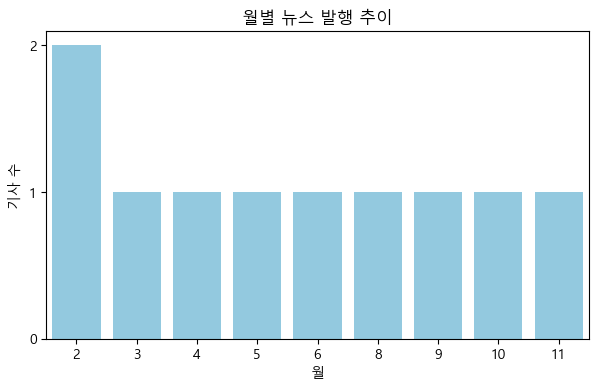

In [44]:
# 월별 뉴스 발행 추이

plt.figure(figsize=(7,4))
ax = sns.countplot(data=df, x="month", color="skyblue")
plt.title("월별 뉴스 발행 추이")#
plt.xlabel("월")
plt.ylabel("기사 수")

ax.set_yticks(range(0, int(df['month'].value_counts().max()) + 1))
plt.show()